# k-최근접 이웃 회귀

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [56]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib import font_manager, rc

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

# 마이너스 기호가 깨지지 않도록 설정합니다.
plt.rcParams['axes.unicode_minus'] = False

In [57]:
import numpy as np

In [58]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [59]:
import matplotlib.pyplot as plt

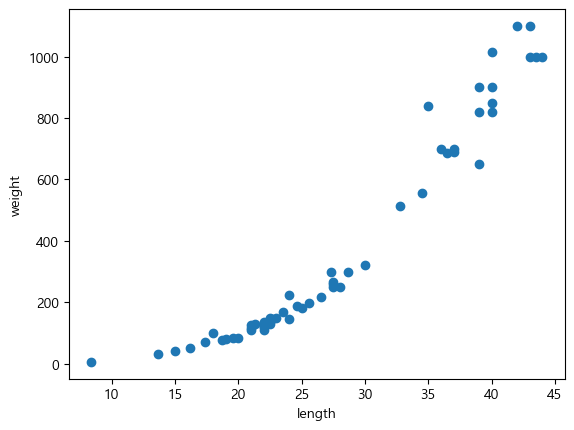

In [60]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.model_selection import train_test_split  # Scikit-learn에서 train_test_split 함수를 불러옵니다

# perch_length와 perch_weight 데이터를 학습용과 테스트용으로 나눕니다.
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42) 

# train_input: 학습용 입력 데이터 (perch_length의 일부)
# test_input: 테스트용 입력 데이터 (perch_length의 나머지 부분)
# train_target: 학습용 타겟 데이터 (perch_weight의 일부)
# test_target: 테스트용 타겟 데이터 (perch_weight의 나머지 부분)
# random_state=42: 데이터 분할 시 무작위성을 유지하면서도 같은 결과를 얻기 위해 42로 설정 


In [63]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [64]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


In [65]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [66]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
# test_array = test_array.reshape(2, 3)

In [67]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [68]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)

In [69]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target) # 훈련세트 평가 

KNeighborsRegressor()

In [71]:
knr.score(test_input, test_target)

0.992809406101064

In [72]:
from sklearn.metrics import mean_absolute_error

In [73]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [74]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [75]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target) # 과대적합, 과소적합 평가 
print(knr.score(train_input, train_target))

0.9804899950518966


In [76]:
print(knr.score(test_input, test_target)) # 바로 위와 비교 함으로서 과대적합인지, 과소적합인지 판단가능 

0.9746459963987609


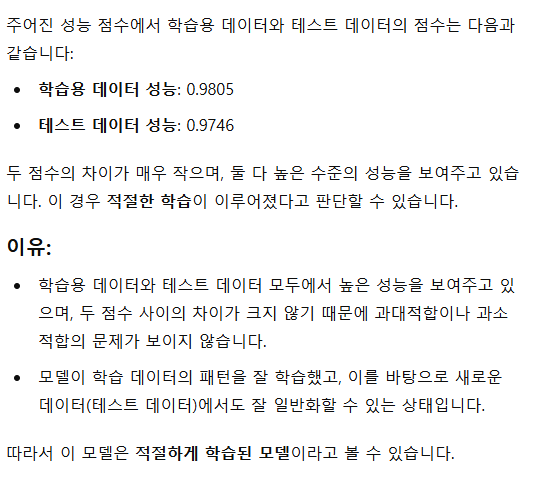

## 확인문제

과대적합과 과소적합에 대한 이해를 돕기 위해 복잡한 모델과 단순한 모델을 만들겠습니다. 

앞서 만든 k - 최근접 이웃 회귀 모델의  k값을 1,5,10으로 바꿔가며 훈련해보세요. 

그다음 농어의 길이를 5에서 45까지 바꿔가며 예측을 만들어 그래프로 나타내보세요. 

n이 커짐에 따라 모델이 단순해지는 것을 볼수 있나요?

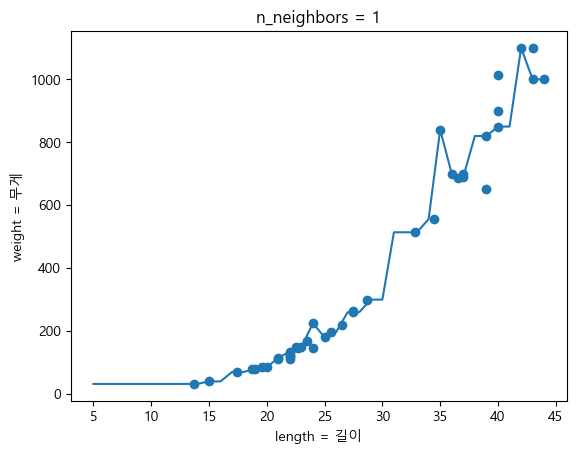

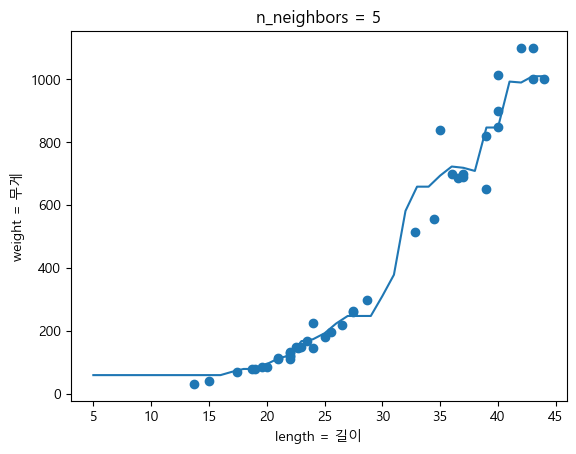

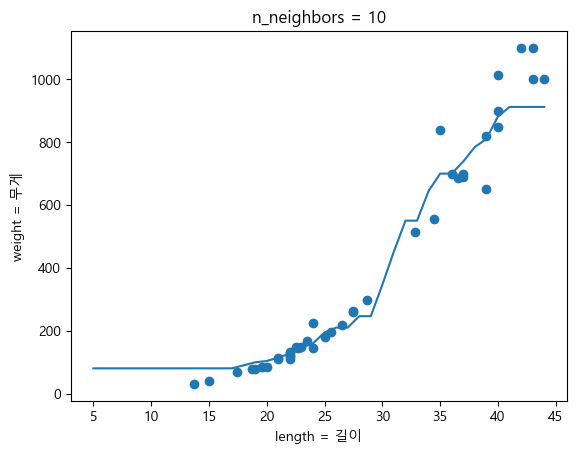

In [77]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title(f'n_neighbors = {n}')
    plt.xlabel('length = 길이')
    plt.ylabel('weight = 무게')
    plt.show()